# Assignment 6 - 2 Node Networks

Description: These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

Link: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

In the below analysis we will calculate various metrics of this the davis southern club women dataset. 

On the initial look the dataset is an bipartite dataset. It consists of the women in one or multiple clubs. So the nodes are split into two categories and different analysis were made on it.

In [43]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
# %matplotlib notebook
import pandas as pd


## Women Analysis

1. Find out all the subgraphs and figureout the important nodes and connections
2. Find out the open Triads
3. Create a function for all analysis by passing parameter
4. Find the Clinques
5. Block models pg 86

As a initial step lets write some functions which will be used to carry out the analysis throughtout the network. Description of each function is provided in the function documentaiton.

In [44]:
def sorted_map(map1):
    """Defined a function to sort the dictionary"""
    ms = sorted(map1.items(), key =lambda k: -k[1])
    return ms

In [45]:
def trim_edges(g, weight=1):
    """Function to trim the edges based on the weight provided. Default weight is 1"""
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [46]:
def island_method(g, iterations=5):
    """Using island method, we are limiting the number of nodes and clusters. 
    It calls trim edges with a threshold value. 
    
    Output of this function is the list of graphs with different threshold level.
    """
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    print(mx)
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [47]:
def nodes_analysis(G):
    """This function will perform the degree centrality of the complete graph. 
    It also calculates the individual degree centrality of that particular node.
    """
    
    if len(list(nx.connected_component_subgraphs(G))) == 1:
        if nx.is_bipartite(G):
            print("\nBipartite Degree Centrality of Women:{}",format(sorted_map(nx.bipartite.degree_centrality(G,[n for n in G.nodes() if G.node[n]['bipartite'] == 0]))[:5]
))
        
        else:
            print("\nIs all nodes connected? {}".format(nx.is_connected(G)))
            print("\nTop 5 women with high degree: {}".format(sorted_map(nx.degree_centrality(G))[:5]))
        

In [48]:
def node_info(G):
    """Provides various information of that particular graph. It calculates the
    diameter, radius and other information"""
    
    print("\nNode information:{}".format(nx.info(G)))    
    print("\nGraph Diameter:{}".format(nx.diameter(G)))
    print("\nGraph Radius:{}".format(nx.radius(G)))

In [49]:
def triange_edges(G):
    """This function calculates the number of triangles which are formed in that particular grapth.
    It also finds the maximum cliques in that particular graph."""
    
    print("\nNodes Triangles:".format(sorted_map(nx.triangles(G))[:5]))
    print("\nDifferent Maximum Cliques:{}".format(list(nx.algorithms.clique.find_cliques(G))))

In [50]:
def draw_chart(G):

    """This function plots the chart according to the graph type. 
    If it is bipartite graph type, it shows the circular graph.
    
    If not it will show the random networkx graph."""
    if nx.is_bipartite(G):
        edge_width = [1 for u,v in G.edges()]
        node_color =[5 if G.node[g]['bipartite'] ==0 else 8 for g in G.nodes()]
        node_size = [G.degree(v)*100 for v in G]
        pos = nx.circular_layout(G)

    else:
        node_color = [G.degree(v)*100 for v in G]
        node_size = [G.degree(v)*100 for v in G]
        if nx.is_weighted(G):
            edge_width = [0.5*G[u][v]['weight'] for u,v in G.edges()]
        else:
            edge_width = [1 for u,v in G.edges()]
        pos = nx.random_layout(G)
        
    plt.figure(figsize=(7,7))
    nx.draw_networkx(G, pos,node_color=node_color,alpha=0.5,with_labels=True, 
                    width=edge_width, edge_color ='.4',node_size=node_size)
    plt.show()

In [51]:
nx.is_weighted(G)

False

In [52]:
def helping_function(G, method="Y"):
    """Helping function to call all the other functions."""
    
    if nx.is_bipartite(G):
        node_info(G)
        #triange_edges(G)
        draw_chart(G)
    else:
        node_info(G)
        triange_edges(G)
        if(method =="Y"):
            result_island = island_method(G)[3][1]
            nodes_analysis(result_island)
            draw_chart(result_island)
        elif(method=="N"):
            nodes_analysis(G)
            draw_chart(G)
            


General analysis on the graph object:



Node information:Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625

Graph Diameter:4

Graph Radius:3


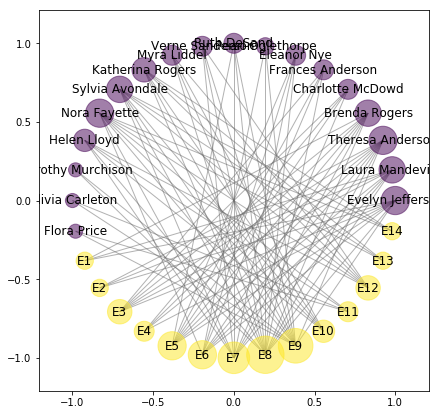


Analysis on projected women graph object without weights:



Node information:Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444

Graph Diameter:2

Graph Radius:1

Nodes Triangles:

Different Maximum Cliques:[['Evelyn Jefferson', 'Verne Sanderson', 'Theresa Anderson', 'Sylvia Avondale', 'Nora Fayette', 'Ruth DeSand', 'Helen Lloyd', 'Charlotte McDowd', 'Brenda Rogers', 'Frances Anderson', 'Eleanor Nye', 'Laura Mandeville'], ['Evelyn Jefferson', 'Verne Sanderson', 'Theresa Anderson', 'Sylvia Avondale', 'Nora Fayette', 'Ruth DeSand', 'Helen Lloyd', 'Myra Liddel', 'Katherina Rogers', 'Pearl Oglethorpe', 'Dorothy Murchison', 'Flora Price', 'Olivia Carleton'], ['Evelyn Jefferson', 'Verne Sanderson', 'Theresa Anderson', 'Sylvia Avondale', 'Nora Fayette', 'Ruth DeSand', 'Helen Lloyd', 'Myra Liddel', 'Katherina Rogers', 'Pearl Oglethorpe', 'Dorothy Murchison', 'Eleanor Nye', 'Brenda Rogers', 'Frances Anderson', 'Laura Mandeville']]

Is all nodes connected? Tru

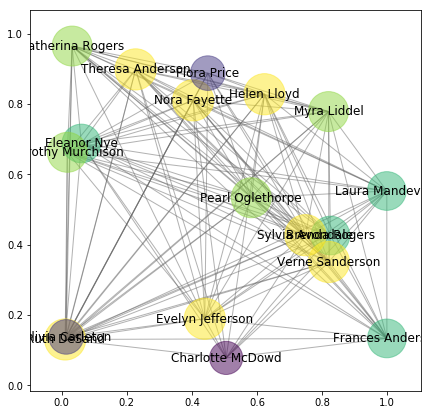


Analysis on projected women graph object with weights:



Node information:Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444

Graph Diameter:2

Graph Radius:1

Nodes Triangles:

Different Maximum Cliques:[['Evelyn Jefferson', 'Verne Sanderson', 'Theresa Anderson', 'Sylvia Avondale', 'Nora Fayette', 'Ruth DeSand', 'Helen Lloyd', 'Charlotte McDowd', 'Brenda Rogers', 'Frances Anderson', 'Eleanor Nye', 'Laura Mandeville'], ['Evelyn Jefferson', 'Verne Sanderson', 'Theresa Anderson', 'Sylvia Avondale', 'Nora Fayette', 'Ruth DeSand', 'Helen Lloyd', 'Myra Liddel', 'Katherina Rogers', 'Pearl Oglethorpe', 'Dorothy Murchison', 'Flora Price', 'Olivia Carleton'], ['Evelyn Jefferson', 'Verne Sanderson', 'Theresa Anderson', 'Sylvia Avondale', 'Nora Fayette', 'Ruth DeSand', 'Helen Lloyd', 'Myra Liddel', 'Katherina Rogers', 'Pearl Oglethorpe', 'Dorothy Murchison', 'Eleanor Nye', 'Brenda Rogers', 'Frances Anderson', 'Laura Mandeville']]
7


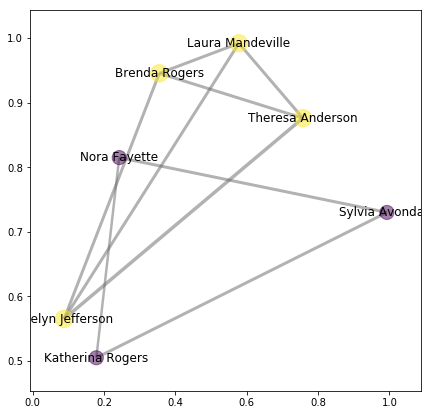


Analysis on projected club graph object with weights:



Node information:Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286

Graph Diameter:2

Graph Radius:1

Nodes Triangles:

Different Maximum Cliques:[['E8', 'E9', 'E6', 'E7', 'E12', 'E13', 'E10', 'E11', 'E14'], ['E8', 'E9', 'E6', 'E7', 'E4', 'E1', 'E2', 'E5', 'E3']]

Is all nodes connected? True

Top 5 women with high degree: [('E6', 1.0), ('E7', 1.0), ('E8', 1.0), ('E9', 1.0), ('E1', 0.6153846153846154)]


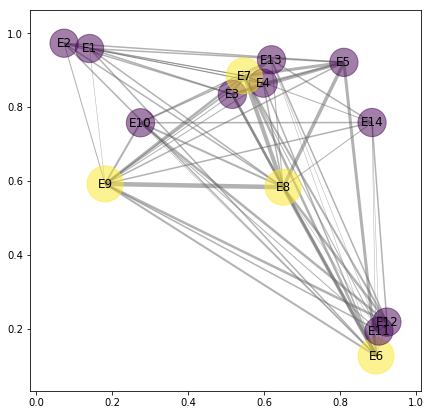

In [53]:
if __name__ == "__main__":
    
    # Importing data
    G = nx.davis_southern_women_graph()

    # Separate the women and clubs in two separate graph. 
    women = G.graph['top']
    clubs = G.graph['bottom']

    # General analysis
    print("\nGeneral analysis on the graph object:\n\n")
    helping_function(G)
    
    # project bipartite graph onto women nodes
    print("\nAnalysis on projected women graph object without weights:\n\n")
    
    W = bipartite.projected_graph(G, women)
        
    helping_function(W,"N")
        
    # project bipartite graph onto women nodes keeping number of co-occurence
    # the degree computed is weighted and counts the total number of shared contacts
    W_weight = bipartite.weighted_projected_graph(G, women)
    print("\nAnalysis on projected women graph object with weights:\n\n")
    
    helping_function(W_weight)
    
    # Clubs analysis. Create a weighted graph
    C = bipartite.weighted_projected_graph(G, clubs)
    
    print("\nAnalysis on projected club graph object with weights:\n\n")
    
    helping_function(C,"N")

# Summary of the Analysis

1. Average degree of bipartite graph is around 5.5 degrees. So approximatly women are in 5 different clubs.
2. Clubs E8, E9 have higher women membership. Theresa, Laura, Evelyn, Sylvia, Nora are having more memberships in different clubs.
3. There is no isolated club or node. All the nodes are connected.
4. On the projected not weighted women graph, average degree is 15. So most of the women is connected to another women.
5. All the women are connected in this graph.
6. There are three different maxium cliques formed in this graph.
7. Theresa, Evelyn, Ruth, Verne, Sylvia are almost connected to all the other womens in the network.
8. On the projected weighted women graph, after trimming down the edges and nodes, Only some of the women are having high importance.
9. On the projected weighted club graph, Average degree is around 10. So each club is connected to other nine clubs approximately.
10. Clubs are connected in different weights, so some clubs are more closely connected. There are two types of clubs from the cliques. 
